In [ ]:
import numpy as np

In [ ]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.layers import LSTM, Dense

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Zomato data
df = pd.read_csv('zomato.csv')

In [ ]:
# Select features
features = ['Open', 'High', 'Low', 'Volume']
X = df[features].values

In [ ]:
# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(X)


In [24]:
# Scale the target (Close) separately
close_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = close_scaler.fit_transform(df[['Close']].values)


In [11]:
# Create sequences (window size 30)
sequence_length = 30
sequences = []

In [12]:
for i in range(len(scaled_data) - sequence_length):
    sequence = scaled_data[i:i + sequence_length]
    sequences.append(sequence)

In [13]:
# Separate features and target
X = np.array(sequences)
y = df['Close'].values[sequence_length:]


In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))


In [16]:
# Compile model
model.compile(loss='mse', optimizer='adam')


In [17]:
# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
15/15 [==============================] - 12s 44ms/step - loss: 8431.0664
Epoch 2/100
15/15 [==============================] - 1s 85ms/step - loss: 7590.7847
Epoch 3/100
15/15 [==============================] - 1s 48ms/step - loss: 7083.3135
Epoch 4/100
15/15 [==============================] - 1s 40ms/step - loss: 6838.9126
Epoch 5/100
15/15 [==============================] - 1s 35ms/step - loss: 6684.7563
Epoch 6/100
15/15 [==============================] - 1s 35ms/step - loss: 6551.6982
Epoch 7/100
15/15 [==============================] - 0s 31ms/step - loss: 6428.0449
Epoch 8/100
15/15 [==============================] - 0s 29ms/step - loss: 6310.0322
Epoch 9/100
15/15 [==============================] - 1s 39ms/step - loss: 6190.9438
Epoch 10/100
15/15 [==============================] - 0s 32ms/step - loss: 6072.5923
Epoch 11/100
15/15 [==============================] - 0s 32ms/step - loss: 5956.7954
Epoch 12/100
15/15 [==============================] - 1s 37ms/step - loss

In [18]:
# Evaluate on test set
predicted_prices = model.predict(X_test)


4/4 [==============================] - 3s 38ms/step


In [26]:
# Reshape predicted prices to reverse scaling
# Rescale predicted prices using the scaler that was trained on 'Close' prices
predicted_prices = close_scaler.inverse_transform(predicted_prices)
close_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = close_scaler.fit_transform(df[['Close']].values)



In [21]:
# Compare actual vs. predicted
df_comparison = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': predicted_prices.flatten()})


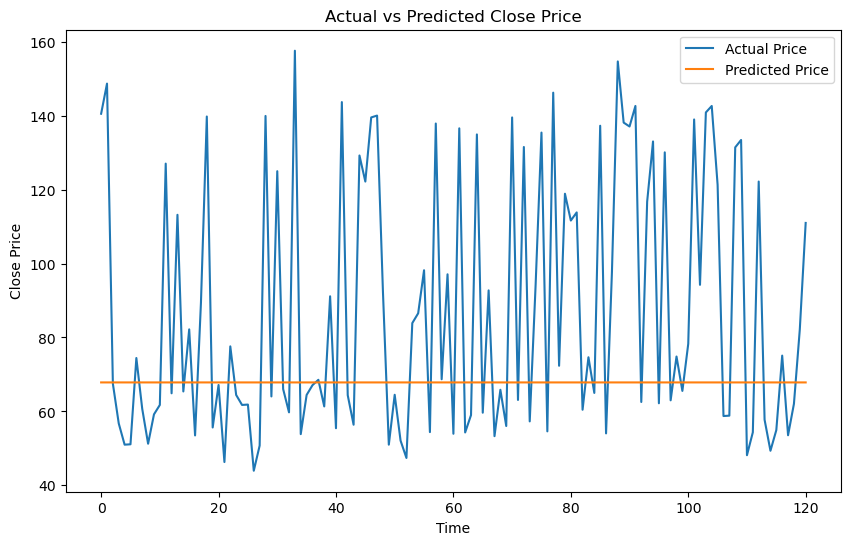

In [22]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df_comparison['Actual_Price'], label='Actual Price')
plt.plot(df_comparison['Predicted_Price'], label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [23]:
# Evaluate model performance metrics
mse = mean_squared_error(y_test, df_comparison['Predicted_Price'])
r2 = r2_score(y_test, df_comparison['Predicted_Price'])
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1556.7274737406574
R-squared: -0.31158621104230777
